# Multiagent systems - TSP Problem

In [1]:
import tsplib95
from random import randrange, random, shuffle
from bisect import bisect
import pandas as pd
import matplotlib.pyplot as plt
# import pixiedust
import numpy as np

In [2]:
#!pip install ipython-autotime
%load_ext autotime

## Load TSP Problem

In [3]:
# Data Source : http://www.math.uwaterloo.ca/tsp/world/countries.html
TSP_FILE = 'uy734.tsp' # 🇺🇾 Uruguay
#TSP_FILE = 'wi29.tsp' # 🇪🇭 Western Sahara
#TSP_FILE = 'ca4663.tsp' # 🇨🇦 Canada

time: 399 µs


In [4]:
# LOAD TSP FILE
PROBLEM = tsplib95.load(TSP_FILE)
print(type(PROBLEM))

<class 'tsplib95.models.StandardProblem'>
time: 9.05 ms


In [5]:
PROBLEM.type

'TSP'

time: 2.43 ms


In [6]:
N = len(list(PROBLEM.get_nodes())) # N is total cities
print("%s Cities"%N)

734 Cities
time: 895 µs


In [7]:
# Example city coordinates
PROBLEM.node_coords[3]

[30233.3333, 57583.3333]

time: 2.21 ms


In [8]:
# Distance between first and last cities
edge = {'start':1,'end':N}
PROBLEM.get_weight(**edge)

5528

time: 1.95 ms


## Basic Ant

In [9]:
HALF_MATRIX = True
class Ant:
    tour = None
    tsp = PROBLEM
    
    def __init__(self, city_i=0):
        self.tour = []
        if city_i>0:
            self.visit(city_i)
    
    @property
    def current_city(self):
        return self.tour[-1]

    @property
    def tour_weight(self):
        return self.tsp.trace_tours([self.tour])[0]
    
    def visit(self, i:int):
        if i in self.tour and i != self.tour[0]:
            raise Exception("The city i: %s is already visited. Imposible to visit again"%i)
        if i < 1 or i > N:
            raise Exception("The city i (%s) is out of range: -> [1, %s]"%(i, N))
        self.tour.append(i)
    
    def distance_to(self, city_j:int):
        return self.tsp.get_weight(self.current_city, city_j)
    
    def _not_visited_cities(self):
        return [i for i in range(1,N+1) if i not in self.tour]
    
    def _raw_probability(self, city_j:int, pheromones_matrix):
        ## ASSUMPTION: We consider the edge has two ways. Phromones to go and to go back. In other words. I->J != J->I
        # careful, we must substract one from the cities index
        if HALF_MATRIX:
            a = min([self.current_city-1, city_j-1])
            b = max([self.current_city-1, city_j-1])
        else:
            a = self.current_city-1
            b = city_j-1
        return (pheromones_matrix[a][b]**ALPHA) * ((1/self.distance_to(city_j))**BETA)
    
    def normalized_probabilities(self, pheromones_matrix):
        """ Returns a tuple
            First element: List of neighbors, cities not visited
            Second element: List of probabilities calculated with the formular of tau_ij^A* h_ij^B
        """
        neighbors = self._not_visited_cities()
        neighbors_pheromone_list = [self._raw_probability(neighbor_j, pheromones_matrix) for neighbor_j in neighbors]
        total = sum(neighbors_pheromone_list)
        normalized_probabilities = [pheromone_ij/total for pheromone_ij in neighbors_pheromone_list]
        #print(normalized_probabilities)
        return neighbors, normalized_probabilities
        
    def pick_next_city(self, cities, probabilities):
        roulette_x = random()
        idx = 0
        roulette_sum = 0
        for p in probabilities:
            roulette_sum += p
            if roulette_sum >= roulette_x  :
                return cities[idx]
            idx += 1
    
    def finished_tour(self):
        return len(self.tour) == N


time: 4.71 ms


In [10]:
a = Ant(1)
print(a.tour)
a.visit(29)
print(a.tour)
print("Total weight of this ant tour is: %s"%a.tour_weight)

[1]
[1, 29]
Total weight of this ant tour is: 2928
time: 1.09 ms


In [11]:
def plot_pheromones(df, step, show=True, title=''):
    print(title)
    if show:
        plt.imshow(df, cmap='hot', interpolation='nearest')
        plt.savefig("pheromones-%03d.png"%step)
        plt.show()
    #plt.imsave("pheromones-%03d.png"%step, df, cmap='hot')

time: 832 µs


## BASE LINE

In [12]:
# Solution joining all the cities in sequence
ant = Ant(1)
for i in range(2,N+1):
    ant.visit(i)
print(ant.tour)
print(ant.tour_weight)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [13]:
# Random Solution
ant = Ant(1)
random_cities = list(range(2,N+1))
shuffle(random_cities)
for i in random_cities:
    ant.visit(i)
print(ant.tour)
print(ant.tour_weight)

[1, 7, 340, 194, 534, 221, 8, 716, 19, 393, 151, 212, 543, 190, 255, 310, 556, 176, 648, 297, 312, 229, 505, 174, 606, 379, 448, 664, 26, 16, 52, 207, 577, 337, 472, 499, 435, 186, 170, 200, 258, 133, 189, 156, 452, 37, 422, 491, 708, 136, 130, 326, 653, 463, 205, 566, 276, 397, 113, 498, 411, 638, 639, 63, 473, 184, 508, 434, 316, 334, 734, 72, 574, 554, 439, 420, 5, 672, 240, 471, 484, 588, 296, 455, 12, 301, 405, 401, 541, 111, 371, 231, 456, 632, 243, 123, 451, 465, 482, 631, 627, 535, 559, 721, 247, 678, 104, 203, 677, 108, 564, 383, 517, 633, 700, 686, 634, 647, 11, 660, 478, 645, 59, 135, 514, 459, 502, 285, 187, 30, 640, 358, 621, 53, 192, 317, 58, 99, 260, 720, 278, 624, 532, 706, 309, 370, 529, 222, 352, 165, 727, 73, 325, 503, 79, 283, 204, 179, 524, 618, 342, 119, 269, 416, 562, 306, 701, 608, 237, 274, 731, 126, 246, 140, 711, 415, 595, 726, 345, 149, 615, 432, 313, 273, 412, 49, 103, 91, 324, 349, 227, 486, 396, 382, 675, 728, 394, 265, 354, 264, 487, 635, 485, 467, 557, 

In [14]:
# Solution using the heuristic
ant = Ant(1)
while not ant.finished_tour():
    neighbors = ant._not_visited_cities()
    distances = []
    for city_j in range(1, len(neighbors)+1):
        distances.append(ant.distance_to(city_j))
    pos_min_distance = distances.index(min(distances))
    next_closest_city = neighbors[pos_min_distance]
    ant.visit(next_closest_city)
print(ant.tour)
print(ant.tour_weight)

[1, 2, 4, 7, 11, 16, 22, 29, 37, 46, 56, 67, 79, 92, 106, 121, 137, 154, 172, 191, 211, 232, 254, 277, 301, 326, 352, 379, 407, 436, 466, 497, 529, 562, 596, 631, 667, 704, 733, 734, 730, 726, 729, 727, 728, 731, 732, 723, 717, 725, 721, 716, 722, 724, 719, 718, 720, 710, 711, 714, 715, 712, 689, 709, 705, 706, 698, 699, 700, 701, 702, 703, 707, 708, 696, 697, 713, 692, 690, 694, 693, 678, 691, 695, 683, 679, 680, 688, 686, 675, 682, 676, 681, 677, 684, 673, 687, 668, 639, 685, 665, 644, 670, 664, 645, 674, 666, 672, 669, 671, 646, 649, 661, 640, 662, 634, 601, 641, 647, 636, 619, 654, 653, 637, 658, 663, 655, 659, 656, 638, 610, 626, 650, 627, 606, 660, 612, 632, 625, 613, 629, 652, 602, 611, 633, 642, 624, 615, 616, 617, 657, 620, 621, 648, 595, 603, 609, 628, 618, 630, 635, 597, 598, 599, 586, 608, 622, 593, 583, 607, 651, 591, 605, 592, 588, 582, 587, 589, 571, 577, 590, 572, 570, 575, 569, 538, 579, 574, 564, 604, 600, 623, 585, 580, 584, 578, 548, 545, 573, 614, 563, 568, 567, 55

## ANT SYSTEM

In [15]:
def ant_system(show=True):
    # INIT MATRIX for each CITY IJ with TAU INITIAL (t_0)
    _pheromones_row = [TAU_INITIAL for i in range(N)]
    pheromones_matrix = [_pheromones_row for j in range(N)]

    history_list = []

    for step in range(STEPS):
        ants_list = []
        for ant_i in range(M_ANTS):
            # pick a starting point
            first_random_city = randrange(N)+1
            ant = Ant(first_random_city)
            ants_list.append(ant)
            while not ant.finished_tour():
                # calculate probability P_j for all unvisited neightbors J
                    # ANT SYSTEM (AS): Probability of each edge in the neighborhood
                    # p_ij_k = (t_ij^a * (1/d_ij)^b ) / SUM(all feasible g edges) # It's like edge normalized
                neighbors, probabilities = ant.normalized_probabilities(pheromones_matrix) # sum(probabilities) == 1
                # pick the next node using the probabilities
                next_city = ant.pick_next_city(neighbors, probabilities)
                ant.visit(next_city)
            ant.visit(first_random_city) # Close cycle??
        history_list.append(ants_list.copy()) # save results
        # update pheromone values based upon the quality of each solution
            # ANT SYSTEM (AS): All ants contribute updating the pheromone as follows
            # TAU_I_J = (1-RO)*TAU_I_J + SUM(Q/(Lk or 0)) # Attention! In TSP Lk will be always the same == N Total cities
                                               # Probably in TSP the length means the distance
        pheromones_to_add = [[0 for i in range(N)] for j in range(N)]
        for ant in ants_list:
            tau_delta = Q/ant.tour_weight
            for tour_i in range(1, len(ant.tour)):
                i = ant.tour[tour_i-1]-1 # city
                j = ant.tour[tour_i]-1 # next city
                if HALF_MATRIX:
                    a = min([i,j])
                    b = max([i,j])
                else:
                    a = i
                    b = j
                pheromones_to_add[a][b] += tau_delta
        # update fermonones
        df = pd.DataFrame(pheromones_matrix)*(1-RO)+pd.DataFrame(pheromones_to_add)
        pheromones_matrix = df.values
        # PLOT every 10th of steps
        if step % int(STEPS/10) == 0:
            plot_pheromones(df,step=step+1, title="Step %s from %s."%(step+1,STEPS), show=show)
    # Plot last result
    plot_pheromones(df,step=step+1, title="Step %s from %s."%(step+1,STEPS), show=True)
    return history_list, ants_list

time: 3.65 ms


In [29]:
M_ANTS = int(N/20) # Number of ants ~ to number of nodes (N)
ALPHA = 1 # History coefficietn ~ 1
BETA = 3 # 0,1,2,3,4,5,6 # Heuristic Coefficient [2,5]
RO = 0.2# Evaporation rate # It's like cooling. A high value is similar to very decrease the temparature drastically and get stucked in a local optimum
Q = 1 # Pheromone change factor
TAU_INITIAL = 1/844742 # Initial pheromone ~ 1/RO*C^nn ; C^nn is the length of the tour generated by the nearest neighbor heuristic
STEPS = 10

history_list, ants_list = ant_system(show=False)

Step 1 from 10.
Step 2 from 10.
Step 3 from 10.
Step 4 from 10.
Step 5 from 10.
Step 6 from 10.
Step 7 from 10.
Step 8 from 10.
Step 9 from 10.
Step 10 from 10.
Step 10 from 10.
time: 20min 36s


In [30]:
tours_weight_list = [a.tour_weight for a in ants_list]
print(tours_weight_list)

[125807, 115337, 112479, 109858, 116290, 120423, 116310, 109534, 115721, 113606, 113319, 118736, 109491, 111144, 117954, 120146, 105801, 116076, 117358, 111959, 112498, 112430, 110754, 110227, 117658, 118810, 119267, 113022, 119042, 114401, 107379, 112959, 115567, 113202, 118588, 119847]
time: 124 ms


In [31]:
#pos_min = tours_weight_list.index(min(tours_weight_list))
all_ants_list = [ant for ants_step_list in history_list for ant in ants_step_list]
all_tours_weight_list = [a.tour_weight for a in all_ants_list]
pos_min = all_tours_weight_list.index(min(all_tours_weight_list))
print("Min weigth: %s"%all_tours_weight_list[pos_min])
best_ant = all_ants_list[pos_min]
best_tour = best_ant.tour
print("Best Tour: %s"%best_tour)

Min weigth: 105801
Best Tour: [593, 608, 594, 595, 566, 634, 667, 652, 532, 524, 516, 531, 540, 553, 565, 546, 545, 549, 495, 467, 468, 461, 464, 452, 440, 415, 403, 393, 388, 385, 396, 397, 407, 398, 382, 367, 354, 350, 366, 362, 349, 327, 319, 309, 279, 249, 221, 204, 210, 228, 222, 216, 193, 197, 206, 198, 201, 177, 173, 202, 211, 217, 218, 223, 225, 219, 232, 238, 255, 259, 288, 287, 290, 286, 283, 275, 258, 254, 250, 282, 303, 315, 307, 320, 308, 299, 311, 356, 389, 376, 377, 380, 383, 405, 406, 373, 363, 359, 344, 341, 355, 351, 342, 334, 323, 310, 291, 298, 316, 324, 321, 329, 328, 339, 345, 346, 335, 371, 370, 378, 400, 435, 458, 442, 436, 422, 416, 410, 418, 408, 364, 368, 392, 390, 411, 424, 459, 447, 451, 446, 448, 439, 438, 478, 497, 486, 475, 507, 530, 538, 533, 534, 541, 552, 573, 592, 599, 606, 615, 619, 624, 616, 631, 640, 643, 646, 645, 644, 629, 628, 605, 609, 570, 555, 574, 563, 529, 510, 506, 521, 525, 550, 561, 583, 639, 635, 636, 648, 656, 670, 680, 689, 684, 676,

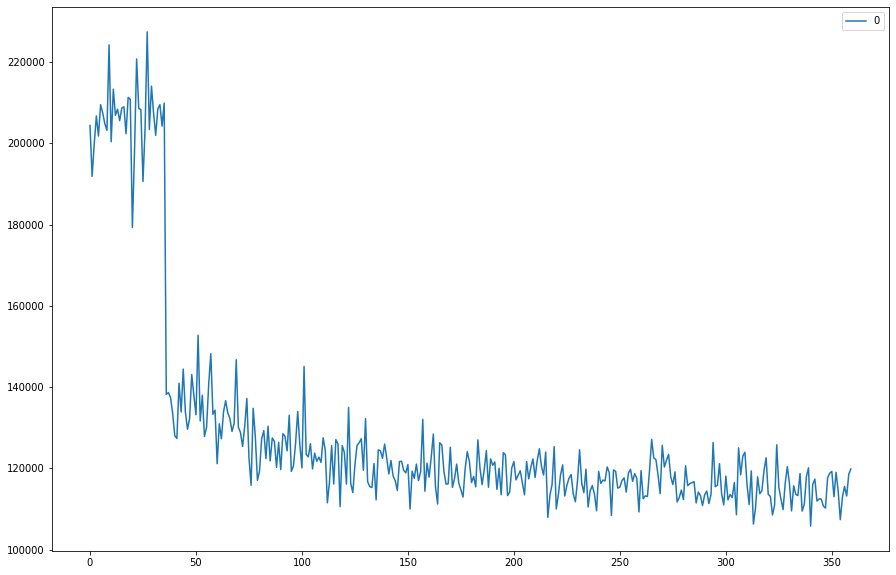

time: 203 ms


In [32]:
pd.DataFrame(all_tours_weight_list).plot(figsize=(15,10))

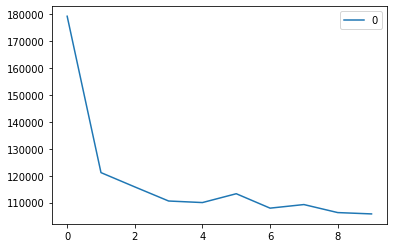

time: 1.31 s


In [33]:
pd.DataFrame([min([a.tour_weight for a in ants_step_list]) for ants_step_list in history_list]).plot()

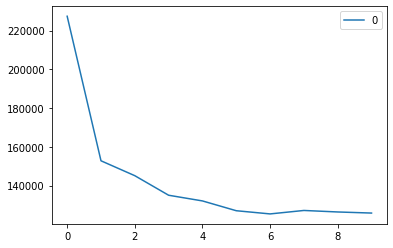

time: 1.32 s


In [34]:
pd.DataFrame([max([a.tour_weight for a in ants_step_list]) for ants_step_list in history_list]).plot()

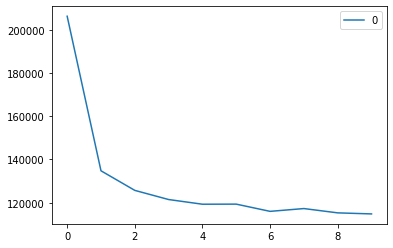

time: 1.28 s


In [35]:
pd.DataFrame([np.mean([a.tour_weight for a in ants_step_list]) for ants_step_list in history_list]).plot()

735


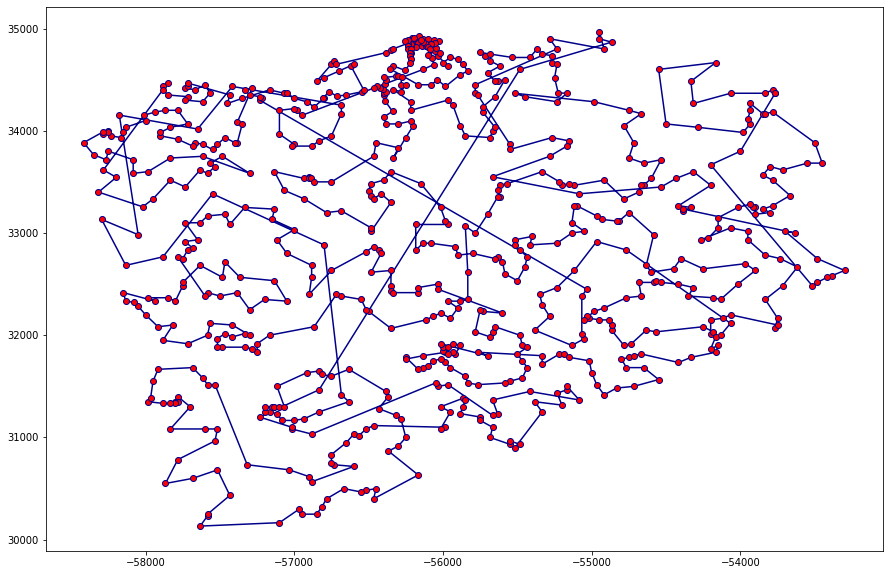

time: 193 ms


In [36]:
map_df_lat = pd.DataFrame([PROBLEM.node_coords[i][0] for i in best_tour], columns=['lat'])
map_df_long = pd.DataFrame([PROBLEM.node_coords[i][1] for i in best_tour], columns=['long'])*-1
print(len(map_df_lat))
plt.figure(figsize=(15,10))
plt.plot(map_df_long,
              map_df_lat,
              c='DarkBlue',
              #style=['o', 'rx'],
              #s=2,
              #figsize=(15,8),
              marker="o",
              markerfacecolor="r")

In [37]:
best_ant.tour_weight

105801

time: 5.09 ms
